## IPBMA_8: CT Slice Reconstruction
### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [337]:
import numpy as np
import matplotlib.pyplot as pyplot

In [338]:
import sys, os
from auxFiles.auxFnc import *
from auxFiles.CTFnc import *

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join(sys.path[0], 'auxFiles', 'CTFnc.py')
    %run {auxFnc}
    %run {CTFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join('.', 'auxFiles', 'CTFnc.py')
    %run {CTFnc}

# READING SINOGRAM

In [339]:
pSinograma= np.load('sinogram.npy')

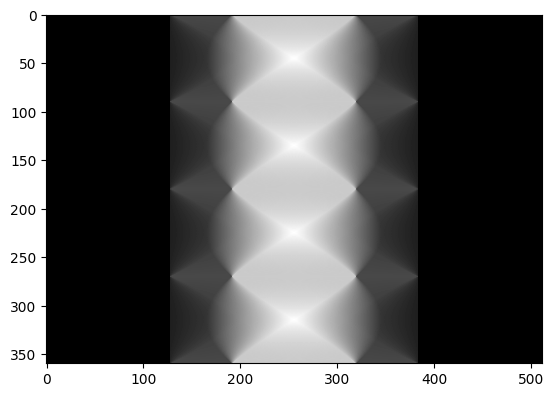

In [340]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [341]:
# RECONSTRUCTOR
# 8 Projections, just to check

rImage= reconstructor(pSinograma, 8)

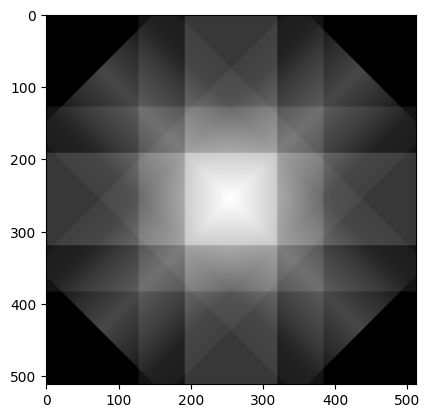

In [342]:
pyplot.imshow(rImage, cmap="gray")
pyplot.show()

In [343]:
# RECONSTRUCTOR

nProjections= 360
rImage= reconstructor(pSinograma, nProjections)

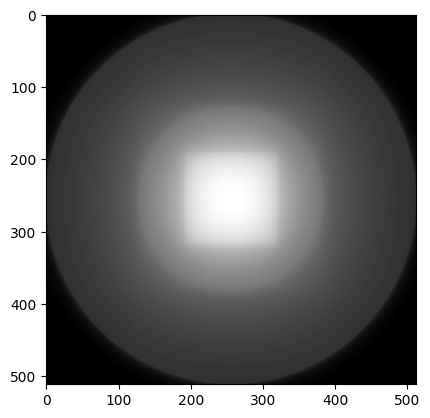

In [344]:
pyplot.imshow(rImage, cmap="gray")
pyplot.show()

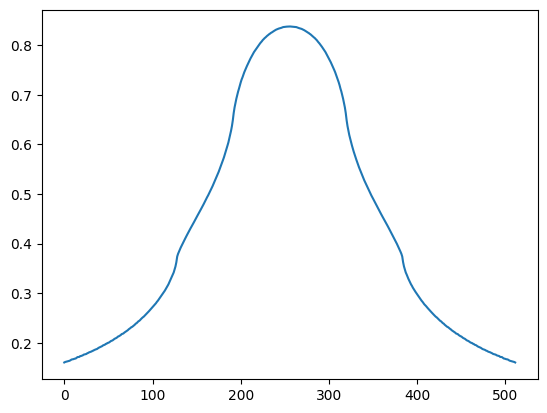

In [345]:
nLine= int(rImage.shape[0]/2)
line= getLine(rImage, nLine)

pyplot.plot(line)

In [346]:
# TRANSFORM TO HOUNSFIELD UNITS

eE= 40

hImage= setHounsfield(rImage, eE)

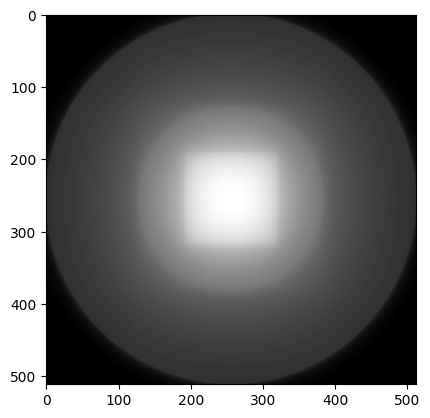

In [347]:
pyplot.imshow(hImage, cmap="gray")
pyplot.show()

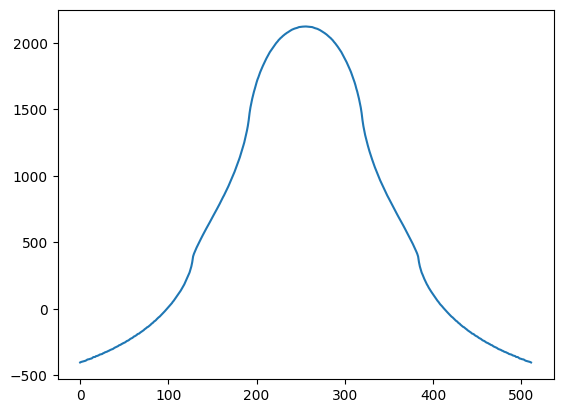

In [348]:
nLine= int(hImage.shape[0]/2)
line= getLine(hImage, nLine)

pyplot.plot(line)

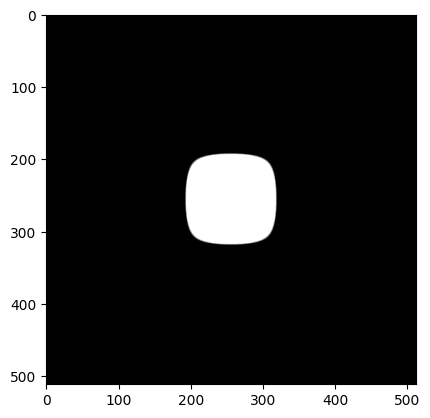

In [349]:
# W/L DISPLAY

vImage= displayWL(hImage, 50, 1500, 255)
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

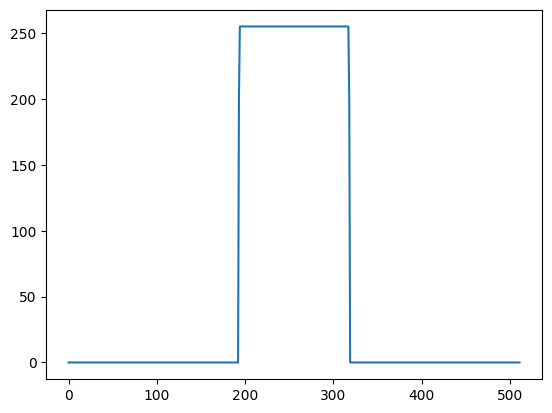

In [350]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)

EXPERIMENTS

In [351]:
W= 50
L= 1500
maxGL= 255

In [352]:
# X-RAY SOURCE

kVp= 100
I0= 75000  
N0, eE= source(kVp, I0)

print(N0, eE)

75000 40.0


EXPERIMENT 1

Cube Phantom

In [353]:
edge_size= 256
obj= cube_phantom_cc(edge_size, eE)

0.28 1.28


Experiment 1.1

In [354]:
# FEATURES

nProjections= 360
h= 128
nDetectors= 512

In [355]:
qSinograma= interactor_CT(N0, obj, h, nProjections)
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)
pSinograma= process_CT(dSinograma, N0)

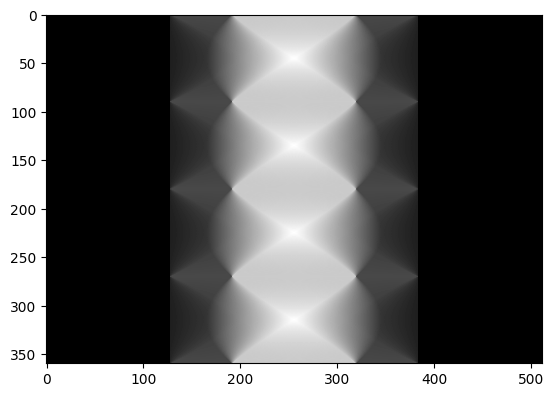

In [356]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [357]:
rImage= reconstructor(pSinograma, nProjections)
hImage= setHounsfield(rImage, eE)
vImage= displayWL(hImage, W, L, maxGL)

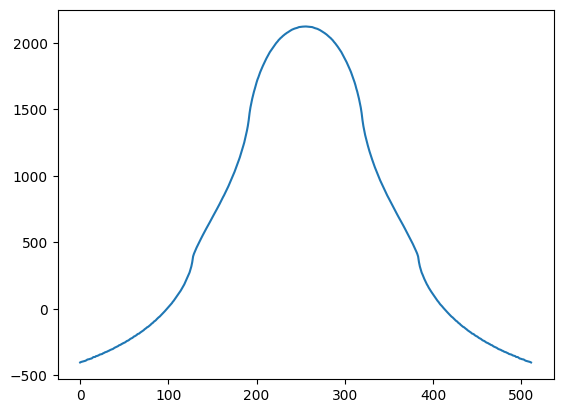

In [358]:
nLine= int(hImage.shape[0]/2)
line= getLine(hImage, nLine)

pyplot.plot(line)

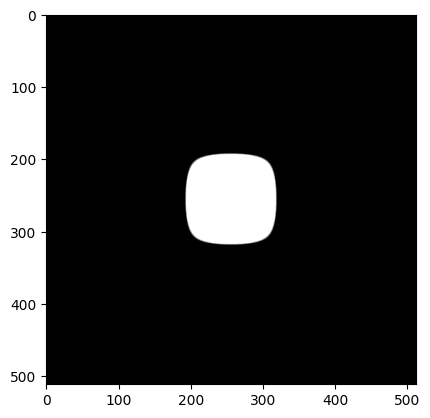

In [359]:
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

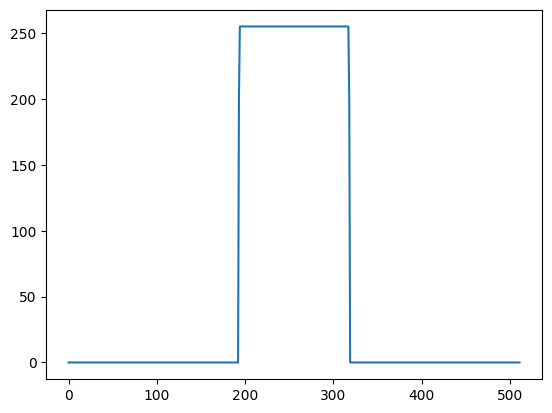

In [360]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)

Experiment 1.2

In [361]:
# FEATURES

nProjections= 360
h= 128
nDetectors= 1024

In [362]:
qSinograma= interactor_CT(N0, obj, h, nProjections)
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)
pSinograma= process_CT(dSinograma, N0)

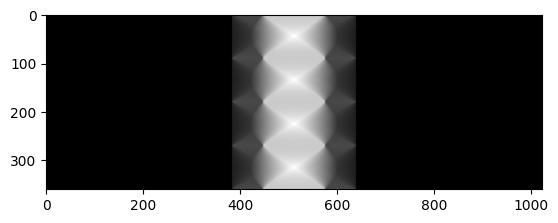

In [363]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [364]:
rImage= reconstructor(pSinograma, nProjections)
hImage= setHounsfield(rImage, eE)
vImage= displayWL(hImage, W, L, maxGL)

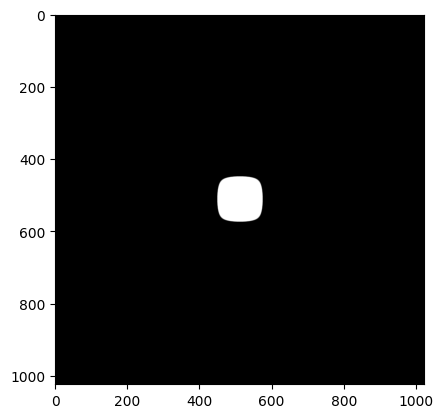

In [365]:
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

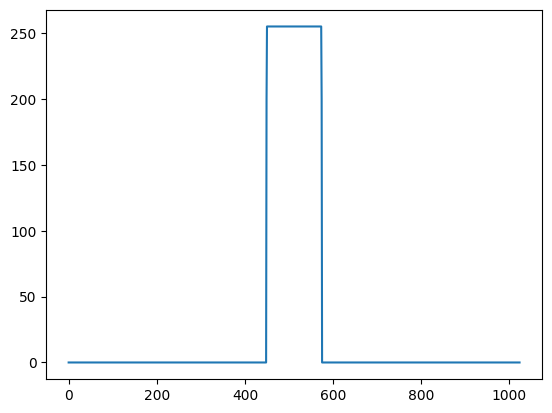

In [366]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)

Experiment 1.3

In [367]:
# FEATURES

nProjections= 360
h= 128
nDetectors= 256

In [368]:
qSinograma= interactor_CT(N0, obj, h, nProjections)
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)
pSinograma= process_CT(dSinograma, N0)

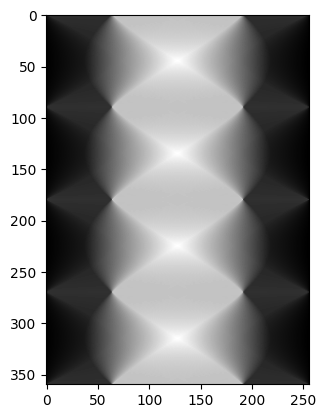

In [369]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [370]:
rImage= reconstructor(pSinograma, nProjections)
hImage= setHounsfield(rImage, eE)
vImage= displayWL(hImage, W, L, maxGL)

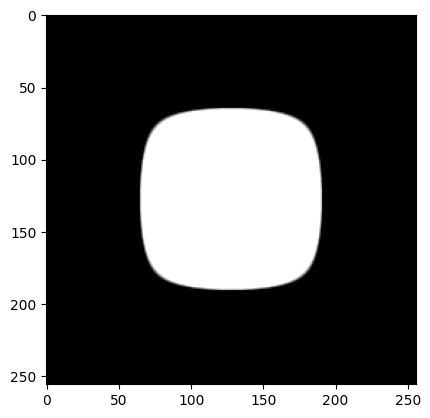

In [371]:
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

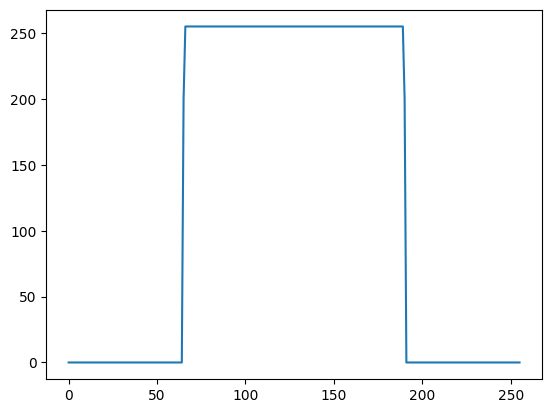

In [372]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)

Experiment 1.4

In [373]:
# FEATURES

nProjections= 20
h= 128
nDetectors= 512

In [374]:
qSinograma= interactor_CT(N0, obj, h, nProjections)
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)
pSinograma= process_CT(dSinograma, N0)

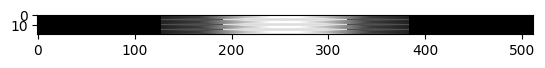

In [375]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [376]:
rImage= reconstructor(pSinograma, nProjections)
hImage= setHounsfield(rImage, eE)
vImage= displayWL(hImage, W, L, maxGL)

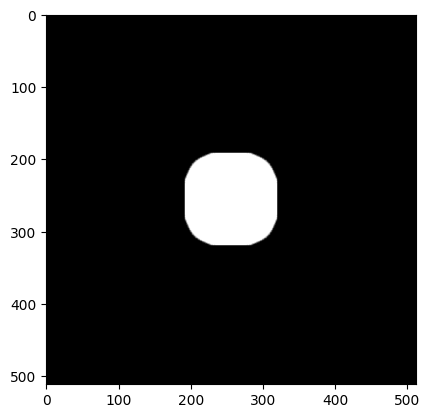

In [377]:
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

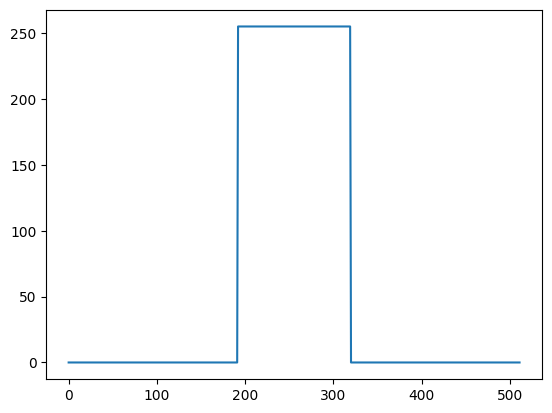

In [378]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)

Experiment 1.5

In [379]:
# FEATURES

nProjections= 720
h= 128
nDetectors= 512

In [380]:
qSinograma= interactor_CT(N0, obj, h, nProjections)
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)
pSinograma= process_CT(dSinograma, N0)

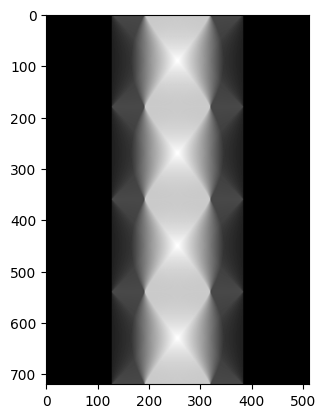

In [381]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [382]:
rImage= reconstructor(pSinograma, nProjections)
hImage= setHounsfield(rImage, eE)
vImage= displayWL(hImage, W, L, maxGL)

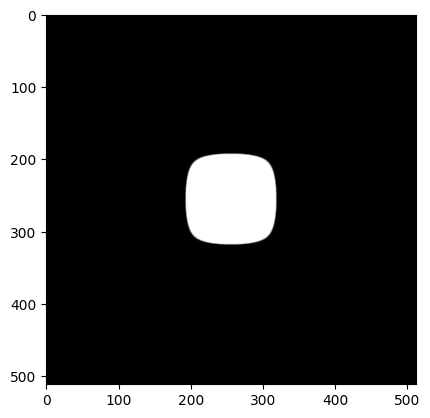

In [383]:
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

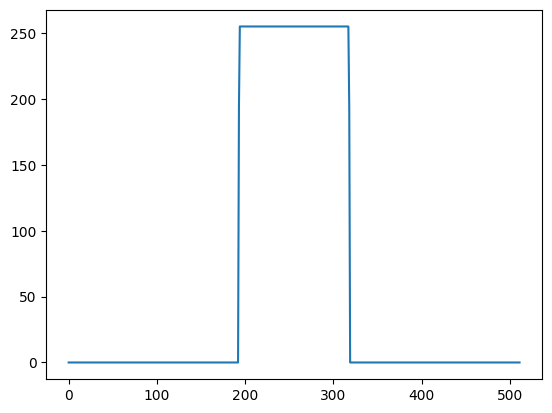

In [384]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)